<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/NeuralNetWithKeras_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

4431872/4422102 [==============================] - 0s 0us/step


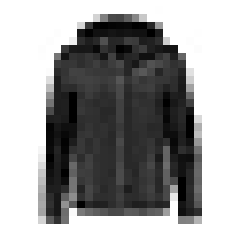

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

print(np.unique(y_train))
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

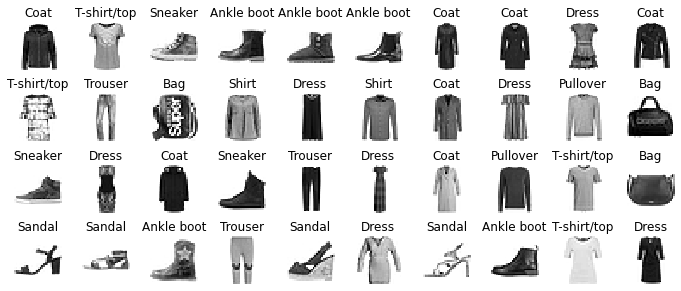

In [ ]:
n_row = 4
n_col = 10

plt.figure(figsize=(n_col*1.2, n_row*1.2))
for row in range(n_row):
    for col in range(n_col):
        index = n_col * row + col
        plt.subplot(n_row, n_col, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


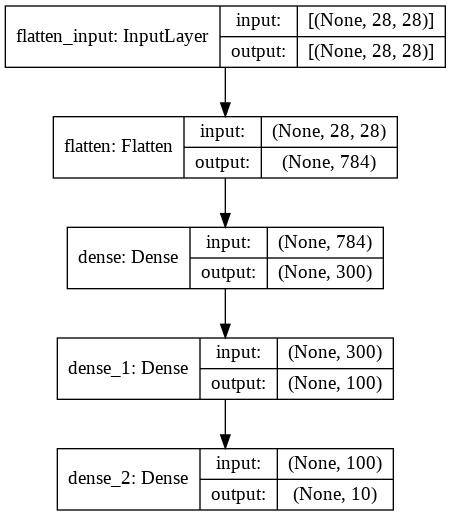

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

keras.utils.plot_model(model, show_shapes=True) 

In [ ]:
hidden1 = model.layers[1]
weights, bias = model.get_layer(hidden1.name).get_weights()
print(hidden1.name)
print(weights.shape, bias.shape)

dense
(784, 300) (300,)


In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])


In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7130 - sparse_categorical_accuracy: 0.7685 - val_loss: 0.4918 - val_sparse_categorical_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4824 - sparse_categorical_accuracy: 0.8321 - val_loss: 0.4659 - val_sparse_categorical_accuracy: 0.8354
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4387 - sparse_categorical_accuracy: 0.8466 - val_loss: 0.4323 - val_sparse_categorical_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4124 - sparse_categorical_accuracy: 0.8557 - val_loss: 0.4066 - val_sparse_categorical_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3916 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.3784 - val_sparse_categorical_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3747 - spars

In [ ]:
print(history.params)
print(history.history.items())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
dict_items([('loss', [0.7130199670791626, 0.48237472772598267, 0.4386763870716095, 0.4124148190021515, 0.39163944125175476, 0.3747013211250305, 0.3627447187900543, 0.35069748759269714, 0.34082940220832825, 0.33114534616470337, 0.32284262776374817, 0.31533390283584595, 0.30715203285217285, 0.30128830671310425, 0.29432880878448486, 0.2885501980781555, 0.28326815366744995, 0.2776681184768677, 0.2719927430152893, 0.2673071026802063, 0.2629074156284332, 0.2575828731060028, 0.2530711591243744, 0.24954640865325928, 0.24523107707500458, 0.24057435989379883, 0.23734499514102936, 0.23287448287010193, 0.2290657013654709, 0.2254769653081894]), ('sparse_categorical_accuracy', [0.7684909105300903, 0.8320545554161072, 0.8465636372566223, 0.8557454347610474, 0.8613272905349731, 0.8673090934753418, 0.871254563331604, 0.8756545186042786, 0.8789818286895752, 0.8812363743782043, 0.8846727013587952, 0.8875272870063782, 0.8893818259239197, 0.892054557800293, 0.894

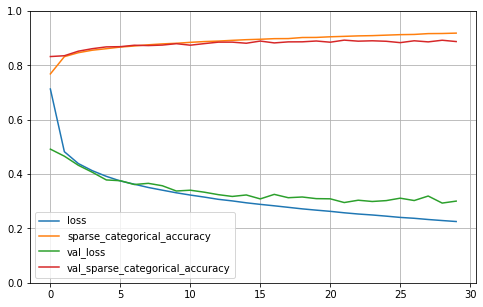

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3377 - sparse_categorical_accuracy: 0.8786


[0.33768031001091003, 0.878600001335144]

In [ ]:
#predict
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


# 회귀


In [9]:

#Regressor

housing = fetch_california_housing()
X_train_full , X_test, y_train_full, y_test = train_test_split(housing['data'], housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
print(X_train.shape, X_valid.shape, X_test.shape)

(11610, 8) (3870, 8) (5160, 8)


In [10]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation=keras.activations.relu, input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD())

In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2195 - val_loss: 0.5443
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4997 - val_loss: 0.4593
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4489 - val_loss: 0.4282
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4317 - val_loss: 0.4172
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4215 - val_loss: 0.4132
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4116 - val_loss: 0.4087
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4051 - val_loss: 0.4050
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3994 - val_loss: 0.3930
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3949 - val_loss: 0.3899
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3909 - val_loss: 0.3876

[0.953 2.84  2.202]
[1.5250672 2.8972933 2.503006 ]


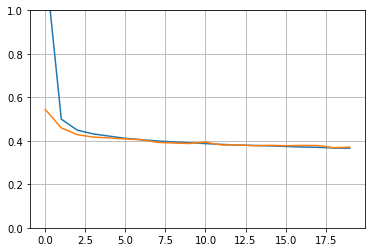

In [12]:
y_pred = model.predict(X_test[:3])
print(y_test[:3])
print(y_pred.reshape(-1))

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 함수형 

In [18]:
#Funtional

np.random.seed(42)
tf.random.set_seed(42)


#1개의 입력
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


#2개의 입력
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model2 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model2.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(learning_rate=1e-3))




#2개의 입력 2개의 출력
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model3 = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

model3.compile(loss=[keras.losses.mean_squared_error, keras.losses.mean_squared_error], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [22]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
X_new = X_test[:3]
y_new = y_test[:3]

In [23]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

history2 = model2.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test2 = model2.evaluate((X_test_A, X_test_B), y_test)
y_pred2 = model2.predict((X_new_A, X_new_B))

history3 = model3.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model3.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model3.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4056 - val_loss: 0.3989
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4046 - val_loss: 0.3978
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4032 - val_loss: 0.3961
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4017 - val_loss: 0.3946
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4007 - val_loss: 0.3943
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3994 - val_loss: 0.3930
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3980 - val_loss: 0.3932
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3969 - val_loss: 0.3904
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3955 - val_loss: 0.3895
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3946 - val_loss: 0.3883

In [28]:
print(y_new)
print(y_pred.reshape(-1))
print(y_pred2.reshape(-1))
print(y_pred_main.reshape(-1), y_pred_aux.reshape(-1))

[0.953 2.84  2.202]
[1.5481619 2.9637146 2.4183147]
[1.2134268 2.7486088 2.6360793]
[1.3215098 2.7880406 2.738461 ] [2.2034822 2.184329  2.5697756]


# 서브 클래싱

In [31]:
#Sub Classing

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")
model.compile(loss=keras.losses.mean_squared_error, loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [32]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 2.7186 - output_1_loss: 2.4222 - output_2_loss: 5.3863 - val_loss: 1.3614 - val_output_1_loss: 0.9978 - val_output_2_loss: 4.6341
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 1.1169 - output_1_loss: 0.8095 - output_2_loss: 3.8833 - val_loss: 0.9468 - val_output_1_loss: 0.7103 - val_output_2_loss: 3.0750
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.8796 - output_1_loss: 0.6786 - output_2_loss: 2.6888 - val_loss: 0.8123 - val_output_1_loss: 0.6494 - val_output_2_loss: 2.2787
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7799 - output_1_loss: 0.6333 - output_2_loss: 2.0995 - val_loss: 0.7430 - val_output_1_loss: 0.6133 - val_output_2_loss: 1.9101
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7264 - output_1_loss: 0.6054 - output_2_loss: 1.8154 - val_loss: 0.7026 - val_output_1_loss: 0.5876 - val_ou

# 모델 저장과 복원



In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [35]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
model.save('keras_model.h5')

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5227 - val_loss: 0.5104
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5104 - val_loss: 0.4998
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4999 - val_loss: 0.4891
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4905 - val_loss: 0.4807
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4826 - val_loss: 0.4737
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4753 - val_loss: 0.4673
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4688 - val_loss: 0.4621
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4634 - val_loss: 0.4568
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4584 - val_loss: 0.4522
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4870


In [37]:
model = keras.models.load_model('keras_model.h5')
model.predict(X_new)

array([[1.3957124],
       [2.9314675],
       [2.8085494]], dtype=float32)

# 콜백


In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(learning_rate=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.7069 - val_loss: 1.2054
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.9370 - val_loss: 0.7988
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7239 - val_loss: 0.6829
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6507 - val_loss: 0.6339
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6135 - val_loss: 0.6029
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5787
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5648 - val_loss: 0.5567
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5467 - val_loss: 0.5390
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5308 - val_loss: 0.5230
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.5368


In [41]:
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.5062 - val_loss: 0.4989
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4967 - val_loss: 0.4897
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4889 - val_loss: 0.4813
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4820 - val_loss: 0.4745
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4764 - val_loss: 0.4692
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4714 - val_loss: 0.4647
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4670 - val_loss: 0.4604
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4634 - val_loss: 0.4571
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4598 - val_loss: 0.4534
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4566 - val_lo

In [43]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_cb])

Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3569 - val_loss: 0.3604

val/train: 1.01
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3562 - val_loss: 0.3613

val/train: 1.01
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3559 - val_loss: 0.3598

val/train: 1.01
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3553 - val_loss: 0.3587

val/train: 1.01
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3549 - val_loss: 0.3579

val/train: 1.01
